### A quick check of wiener filtering

In [1]:
import numpy as np
import curvedsky
from matplotlib.pyplot import *

In [2]:
# define parameters
lmax = 1000 # maximum multipole of alm
npix = 12*512**2
l = np.linspace(0,lmax,lmax+1)

In [3]:
# set up cl and noise covariance
cl  = np.ones(lmax+1) # power spectrum
nij = np.ones(npix) # inverse noise covariance
alm = curvedsky.utils.gauss1alm(lmax,cl) # Gaussian alms are generated here

In [4]:
# simple wiener filtering with diagonal preconditioning
xlm0 = curvedsky.cninv.cnfilter(npix,lmax,cl,nij,alm,1,lmaxs=[lmax],nsides=[512],itns=[10],eps=[1e-6])

In [5]:
# simple wiener filtering with multi-grid preconditioning (additional 1 lower resolution map)
xlm1 = curvedsky.cninv.cnfilter(npix,lmax,cl,nij,alm,2,lmaxs=[lmax,lmax/2],nsides=[512,256],itns=[10,5],eps=[1e-6,1e-1])

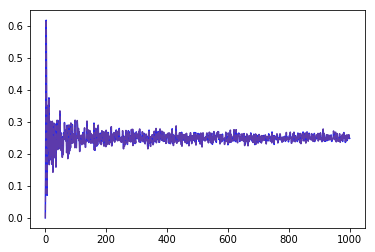

In [6]:
xl0 = curvedsky.utils.alm2cl(lmax,xlm0)
xl1 = curvedsky.utils.alm2cl(lmax,xlm1)
plot(l,xl0)
plot(l,xl1,alpha=0.3,ls='--')